In [4]:
#https://wendynavarrete.com/principal-component-analysis-with-numpy/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Aufgabe 7 - Teil 2

In [64]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal_length","sepal_width",'petal_length','petal_width','species'])
iris_values = iris.drop(columns=["species"])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

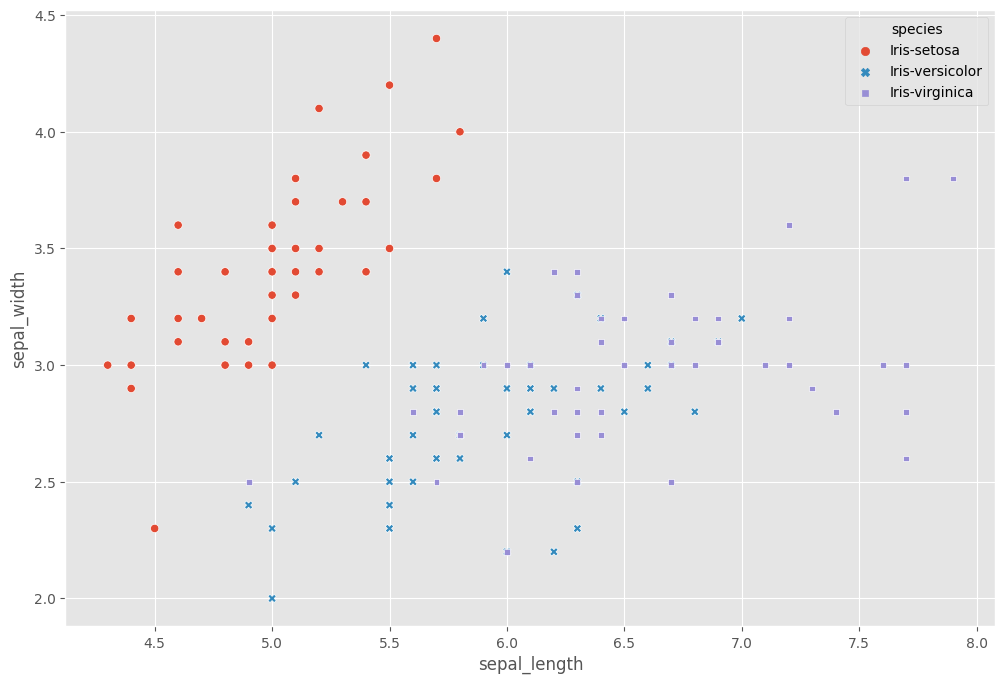

In [65]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)

In [66]:
# normalize it
normalized_iris=(iris_values-iris_values.mean())/iris_values.std()
normalized_iris

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


Berechnen des Datendurchschnitts und der Scattermatrix

In [121]:
# calculate covariance matrix
covariance_matrix = np.cov(normalized_iris.T)
pd.DataFrame(covariance_matrix)

,0,1
0,1.417784,0.286951
1,0.286951,0.586107


Berechnung der Eigenwertzerlegung

In [123]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues, eigenvectors

(array([1.50718075, 0.49671049]),
 array([[ 0.9547405 , -0.29744003],
        [ 0.29744003,  0.9547405 ]]))

Wahl der 𝑄 Eigenvektoren, die zu den 𝑄 größten Eigenwerten in 𝑉 gehören

In [69]:
variance_explained = (eigenvalues / eigenvalues.sum()) * 100
variance_explained

array([72.77045209, 23.03052327,  3.68383196,  0.51519268])

Wir wollen mindestens 95% der Varianz beschreiben

In [91]:
variance_accumulated = np.cumsum(variance_explained)
n_components = next((i for i, item in enumerate(variance_accumulated) if item > 95), None) + 1
variance_accumulated
f"Komponenten: {n_components} [{variance_accumulated[n_components - 1]:.2f}]"

'Komponenten: 2 [95.80]'

Zurückführen auf ursprünglichen Datensatz

In [92]:
projected = normalized_iris.dot(eigenvectors[:,:n_components])
projected

,0,1
0,-2.256981,-0.504015
1,-2.079459,0.653216
2,-2.360044,0.317414
3,-2.296504,0.573447
4,-2.380802,-0.672514
...,...,...
145,1.864277,-0.381544
146,1.553288,0.902291
147,1.515767,-0.265904
148,1.371796,-1.012968


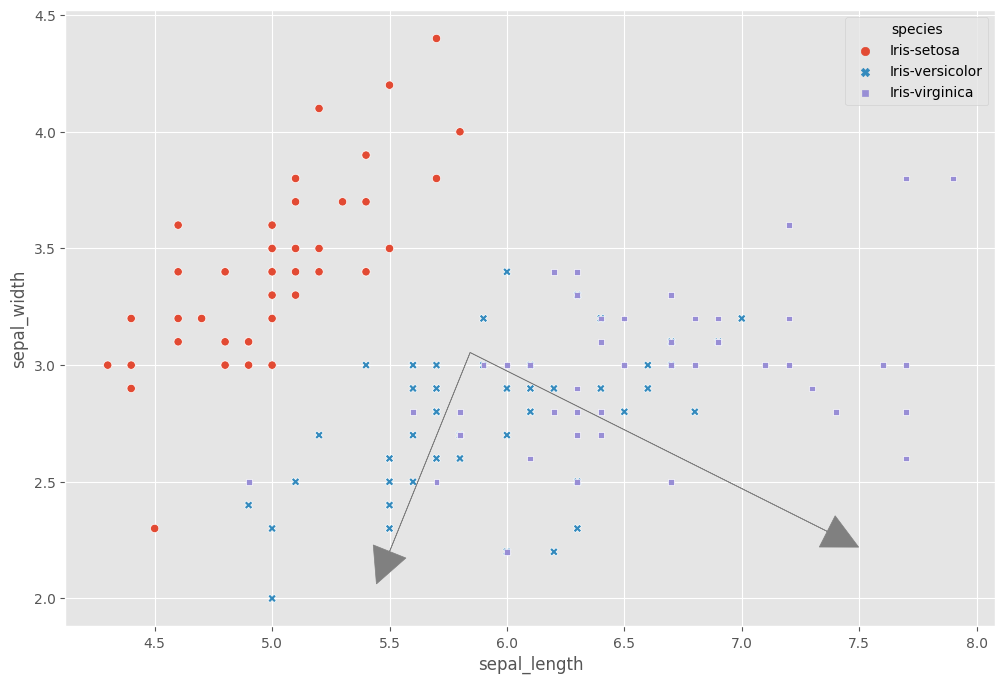

In [95]:
# Create a scatter plot with the chosen eigenvectors
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

# Scatter plot of the original data
scatter = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species, style=iris.species)

# Add arrows representing the eigenvectors
for i in range(n_components):
    arrow_start = [np.mean(iris.sepal_length), np.mean(iris.sepal_width)]
    arrow_end = [arrow_start[0] + eigenvectors[0, i] * eigenvalues[i],
                 arrow_start[1] + eigenvectors[1, i] * eigenvalues[i]]
    scatter.arrow(arrow_start[0], arrow_start[1], arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1],
                  head_width=0.15, head_length=0.15, fc='gray', ec='gray')

plt.show()

# Willkürlicher Datensatz

In [209]:
num_entries = 1000
n_reduction = 1

In [210]:
def generate_random_2d_data(num_entries):
    # Generate random axis (rotation angle)
    angle_rad = np.random.rand() * 2 * np.pi

    # Define the covariance matrix (ellipsoid shape)
    # You can modify these values to control the spread and orientation of the data
    covariance_matrix = np.array([[0.2, 0.1], [0.1, 0.3]])

    # Generate 2D random data with shape (num_entries, 2) distributed along the ellipsoid
    random_data = np.random.multivariate_normal(mean=[0, 0], cov=covariance_matrix, size=num_entries)

    # Rotate the data along the random axis
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    random_data = np.dot(random_data, rotation_matrix)

    return random_data

random_data = generate_random_2d_data(num_entries)
pd.DataFrame(random_data)

,0,1
0,-0.362877,-0.033294
1,0.665863,-0.366393
2,0.926905,-0.075941
3,-0.762699,0.081631
4,1.075981,0.275701
...,...,...
995,0.123828,0.193579
996,0.168297,0.292674
997,0.560193,0.212043
998,0.701440,-0.337046


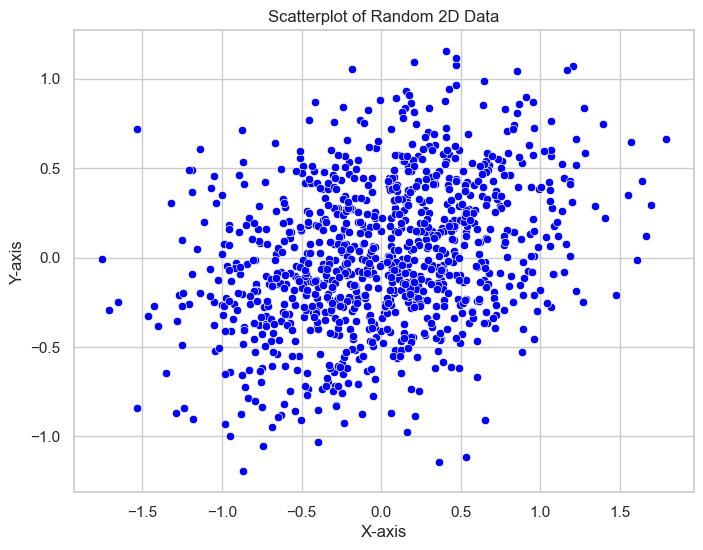

In [211]:
# Create a scatterplot using Seaborn
sns.set(style='whitegrid')  # Optional: Set the style of the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=random_data[:, 0], y=random_data[:, 1], color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatterplot of Random 2D Data')
plt.show()

In [212]:
normalized_data=(random_data-random_data.mean())/random_data.std()
pd.DataFrame(normalized_data)

,0,1
0,-0.717854,-0.067473
1,1.312210,-0.724794
2,1.827338,-0.151630
3,-1.506844,0.159315
4,2.121517,0.542283
...,...,...
995,0.242586,0.380228
996,0.330338,0.575777
997,1.103687,0.416665
998,1.382417,-0.666882


In [213]:
# calculate covariance matrix
covariance_matrix = np.cov(normalized_data.T)
pd.DataFrame(covariance_matrix)

,0,1
0,1.347831,0.307241
1,0.307241,0.654110


In [214]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues, eigenvectors

(array([1.46433782, 0.53760392]),
 array([[ 0.93503086, -0.35456634],
        [ 0.35456634,  0.93503086]]))

In [215]:
variance_explained = (eigenvalues / eigenvalues.sum()) * 100
variance_explained

array([73.14587572, 26.85412428])

In [216]:
variance_accumulated = np.cumsum(variance_explained)
variance_accumulated

array([ 73.14587572, 100.        ])

In [217]:
projected = normalized_data.dot(eigenvectors[:,:n_reduction])
pd.DataFrame(projected)

,0
0,-0.695139
1,0.969970
2,1.654854
3,-1.352458
4,2.175959
...,...
995,0.361641
996,0.513028
997,1.179717
998,1.056149


In [218]:
np.mean(projected)

-0.003184566191453136

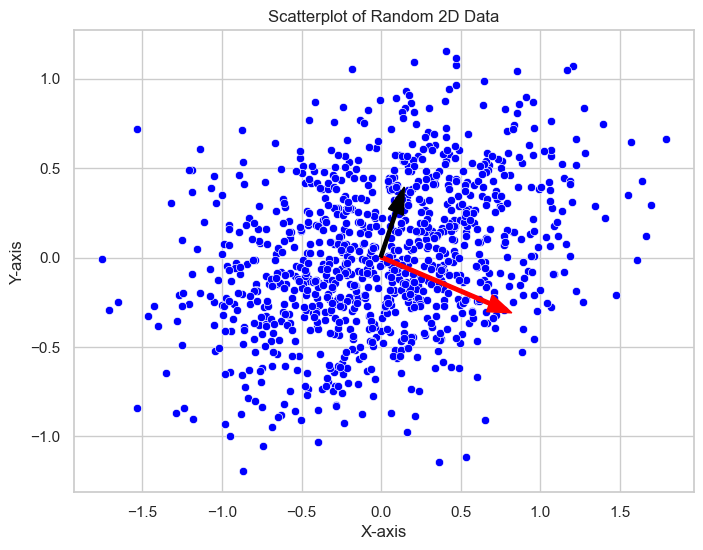

In [219]:
# Create a scatterplot using Seaborn
sns.set(style='whitegrid')  # Optional: Set the style of the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=random_data[:, 0], y=random_data[:, 1], color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatterplot of Random 2D Data')

# Draw the first principal axis onto the scatterplot
mean_x, mean_y = np.mean(random_data, axis=0)
# scale = 1  # You can adjust the scale to control the length of the axis

for i, component in enumerate(eigenvectors):
    scale = variance_explained[i] / 100
    if i < n_reduction:
        plt.arrow(mean_x, mean_y, scale * component[0], scale * component[1],
                color='red', width=0.02, head_width=0.1)
    else:
        plt.arrow(mean_x, mean_y, scale * component[0], scale * component[1],
                color='black', width=0.02, head_width=0.1)

plt.show()